In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [97]:
warnings.filterwarnings("ignore")

In [98]:
data = pd.read_csv("./player_combined_2021_2022.csv")

In [99]:
data.shape

(2916, 137)

In [100]:
print(f"There are {data.shape[0]} players and {data.shape[1]} features")

There are 2916 players and 137 features


In [101]:
data

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,Foul_drawn,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%
0,0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,32.0,64.0,...,52,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6
1,1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,33.1,48.0,...,25,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0
2,2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,27.4,43.0,...,37,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9
3,3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,32.8,110.0,...,69,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1
4,4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,0.5,0.0,...,0,0,0,0.0,0.0,0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2916,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,22,1999,28.8,52.0,...,21,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4
2912,2917,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,23,1997,25.6,58.0,...,67,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9
2913,2918,Martin Ødegaard,no NOR,"MF,FW",Arsenal,eng Premier League,22,1998,30.9,49.0,...,20,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8
2914,2919,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31,1990,24.1,1.0,...,45,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5


<AxesSubplot:xlabel='MP', ylabel='Count'>

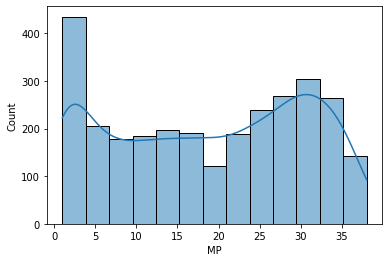

In [102]:
# Total Matches played
sns.histplot(data["MP"], kde=True)

<AxesSubplot:xlabel='90s', ylabel='Count'>

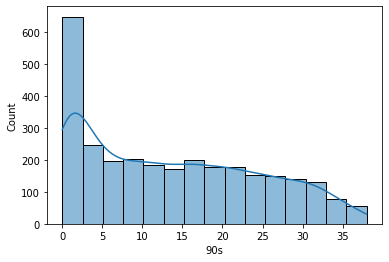

In [103]:
# Total minutes played per 90 minutes
sns.histplot(data["90s"], kde=True)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

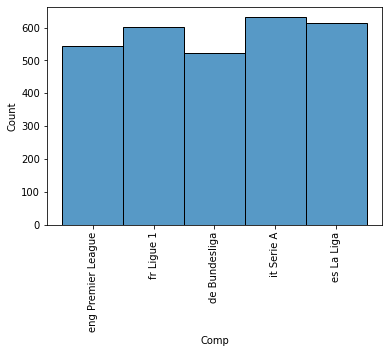

In [104]:
sns.histplot(data["Comp"])
plt.xticks(rotation=90)

In [105]:
data["Nation"] = data["Nation"].apply(lambda x: x.split(" ")[1] )

In [106]:
values = data["Nation"].value_counts()[:10]

In [107]:
values.index


Index(['ESP', 'FRA', 'ITA', 'GER', 'ENG', 'BRA', 'NED', 'ARG', 'POR', 'SEN'], dtype='object', name='Nation')

In [108]:
values.values

array([434, 384, 254, 249, 215, 103,  80,  73,  58,  48], dtype=int64)

<AxesSubplot:xlabel='Nation'>

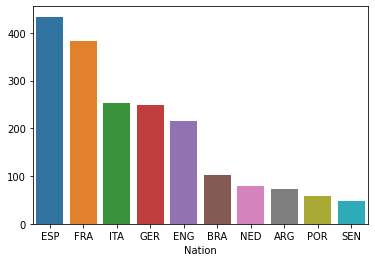

In [109]:
sns.barplot(y = values.values, x=values.index)

<AxesSubplot:xlabel='Age', ylabel='Count'>

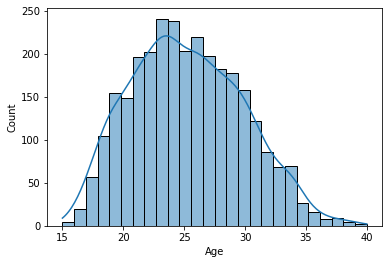

In [110]:
sns.histplot(data["Age"], kde=True)

<AxesSubplot:xlabel='Min', ylabel='Density'>

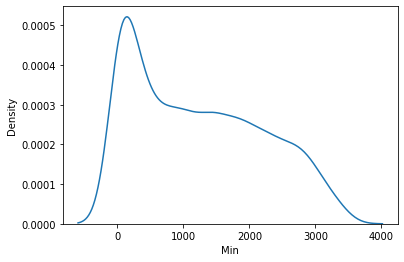

In [126]:
sns.distplot(data["Min"], hist=False)

In [111]:
data['Pos'] = data['Pos'].str.split(',')

In [112]:
data["Pos"]

0           [DF]
1           [DF]
2           [MF]
3           [MF]
4           [FW]
          ...   
2911        [MF]
2912        [MF]
2913    [MF, FW]
2914        [FW]
2915    [MF, FW]
Name: Pos, Length: 2916, dtype: object

In [113]:
encoder = LabelEncoder()

In [114]:
data = data.dropna(subset=["Pos"])

In [115]:
all_positions = set([position for positions_list in data['Pos'] for position in positions_list])

In [116]:
for position in all_positions:
    data[position] = data['Pos'].apply(lambda positions_list: 1 if position in positions_list else 0)

In [120]:
sum_pos = data.iloc[:,-4:].sum()

<AxesSubplot:>

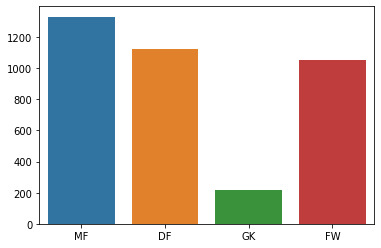

In [122]:
sns.barplot(y = sum_pos.values, x=sum_pos.index)

<AxesSubplot:xlabel='TklWon', ylabel='Density'>

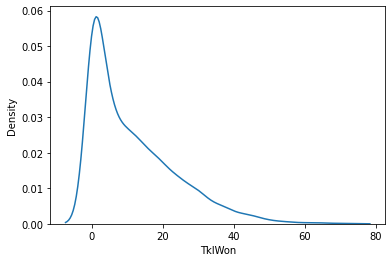

In [128]:
sns.distplot(data["TklWon"], hist=False)

In [151]:
data_test = data.sample(n = 300)

Text(0, 0.5, 'Tackles to win possession')

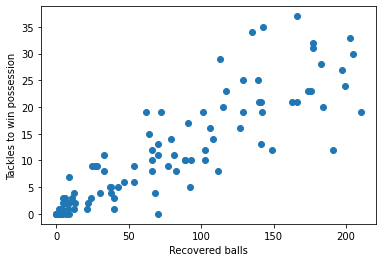

In [152]:
plt.scatter(data_test["recovered_balls"][:100], data_test["Tackles_to_win_possession"][:100])
plt.xlabel("Recovered balls")
plt.ylabel("Tackles to win possession")

<AxesSubplot:xlabel='Touches', ylabel='Density'>

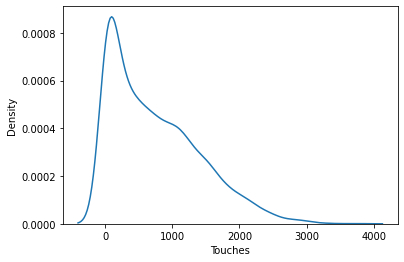

In [153]:
sns.distplot(data["Touches"], hist=False)

<AxesSubplot:xlabel='Dribble_succ%', ylabel='Density'>

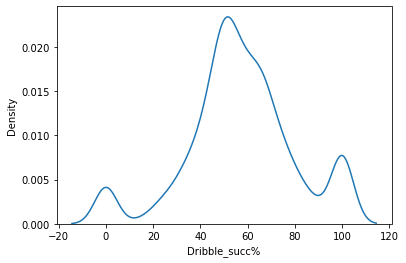

In [154]:
sns.distplot(data["Dribble_succ%"], hist=False)

Shot-Creating Actions (SCA) vs Goal-Creating Actions (GCA): A scatter plot with these two metrics can identify relationships between generating shots and goals. Players excelling at both could be top creators.

Expected Assists (xA) vs Actual Assists (Ast): A scatter plot highlights differences between expected and actual assists. Over or underperforming xA may indicate luck or skill differences.

Text(0, 0.5, 'Goal Creating Action')

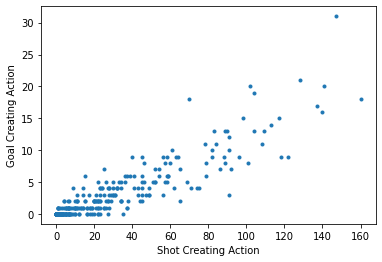

In [156]:
plt.scatter(data_test["SCA"], data_test["GCA"], marker=".")
plt.xlabel("Shot Creating Action")
plt.ylabel("Goal Creating Action")

Text(0, 0.5, 'Actual Assists')

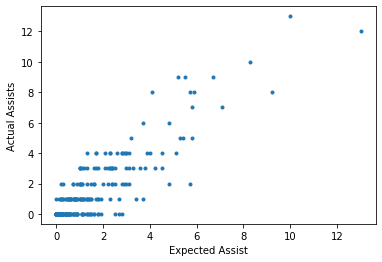

In [158]:
plt.scatter(data_test["xA"], data_test["Ast"], marker=".")
plt.xlabel("Expected Assist")
plt.ylabel("Actual Assists")

Expected Goals (xG) vs Goals Scored (Gls): A scatter plot of these metrics can identify differences between expected and actual goals scored. Over or underperforming xG may indicate luck or finishing ability.

Shots on Target % (SoT%): A histogram of SoT% allows assessing shooting accuracy distribution across players. Finishers should have higher SoT%.

Text(0, 0.5, 'Goals')

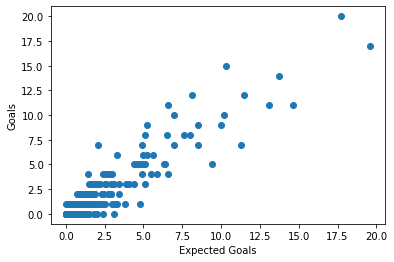

In [160]:
plt.scatter(data_test["xG"], data_test["Gls"])
plt.xlabel("Expected Goals")
plt.ylabel("Goals")

<AxesSubplot:xlabel='SoT%', ylabel='Count'>

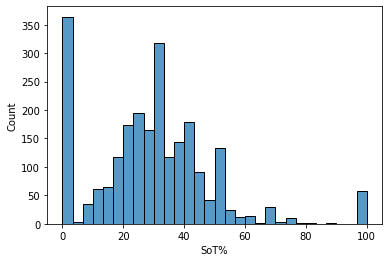

In [161]:
sns.histplot(data["SoT%"])